<a href="https://colab.research.google.com/github/iMan0405/artificial_intelligence/blob/master/Portfolio_uchun_amaliyot_Diabet_kasallagiga_tashxis_qo'yish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

In [17]:
url = '/content/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
column = ['Homiladorliklar', 'Glyukoza', 'Qon bosimi', 'Terining qalinligi', 'Insulin', 'BMI', 'Qandli diabetning naslchilik funktsiyasi', 'Yosh', 'Natija']
df.set_axis(column, axis='columns', inplace=True)
df.head()

<ipython-input-18-0a1f2c65167d>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(column, axis='columns', inplace=True)


,Homiladorliklar,Glyukoza,Qon bosimi,Terining qalinligi,Insulin,BMI,Qandli diabetning naslchilik funktsiyasi,Yosh,Natija
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.shape

(768, 9)

In [20]:
df['Natija'].value_counts()

0    500
1    268
Name: Natija, dtype: int64

In [21]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Homiladorliklar,Glyukoza,Qon bosimi,Terining qalinligi,Insulin,BMI,Qandli diabetning naslchilik funktsiyasi,Yosh,Natija
Homiladorliklar,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glyukoza,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Qon bosimi,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Terining qalinligi,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Qandli diabetning naslchilik funktsiyasi,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Yosh,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Natija,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [22]:
df.corrwith(df['Natija']).abs().sort_values(ascending=False)

Natija                                      1.000000
Glyukoza                                    0.466581
BMI                                         0.292695
Yosh                                        0.238356
Homiladorliklar                             0.221898
Qandli diabetning naslchilik funktsiyasi    0.173844
Insulin                                     0.130548
Terining qalinligi                          0.074752
Qon bosimi                                  0.065068
dtype: float64

##ML ga tayyorgarlik

In [23]:
X = df.drop('Natija', axis=1).values
y = df['Natija']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

##ML

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_predict = knn.predict(X_test)

## Baholash

### Jaccard index

In [27]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.4520547945205479

### Confusion matrix

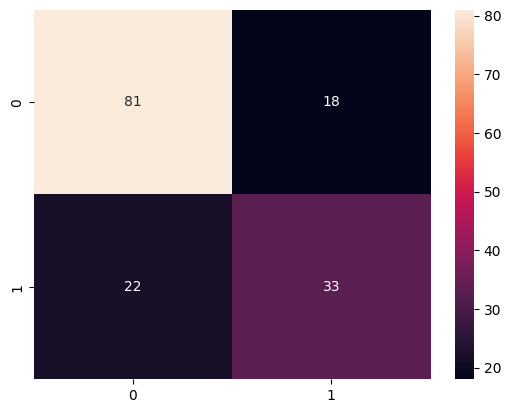

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [29]:
confusion_matrix(y_test, y_predict)

array([[81, 18],
       [22, 33]])

### Precision, recall, F1

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision = }\n{recall = }\n{f1 = }\n{accuracy = }")

precision = 0.6470588235294118
recall = 0.6
f1 = 0.6226415094339622
accuracy = 0.7402597402597403


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



### Cross-validation yordamida tekshiramiz

In [32]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(estimator=knn, X = X, y = y, cv=5)

print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.55      0.59       268

    accuracy                           0.73       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.73      0.73       768



## Eng yaxshi k ni topish

### `for` yordamida

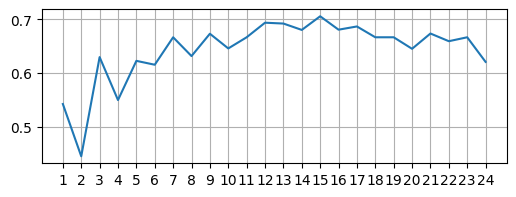

In [34]:
f1 = []
for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(6, 2))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()

### Grid Search yordamida

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [37]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [38]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [39]:
knn_gscv.best_score_

0.7669892199303965

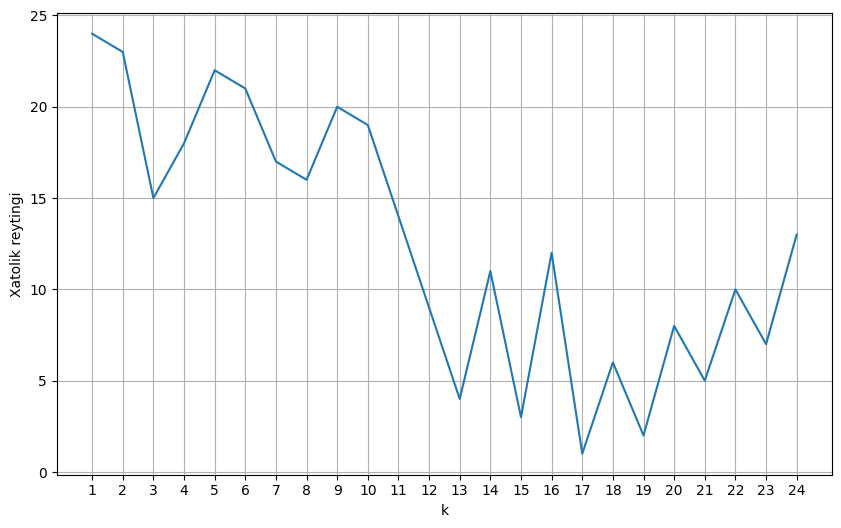

In [40]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik reytingi')
plt.grid()
plt.show()